In [41]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from scipy.optimize import minimize
import random

In [27]:
# read pd
df = pd.read_csv('MN_selected.csv')
df

,id,AssessTot,BldgArea,LotFront,YearBuilt,CommFAR,MedIncome,IfAlter,Central Harlem,Chelsea & Clinton,...,LandUse_8,LandUse_9,LandUse_10,OwnerType_C,OwnerType_M,OwnerType_O,OwnerType_P,OwnerType_X,Zone,LandUse
0,0,156510900,2725731,0.00,1900,0.0,119691,0,0,0,...,1,0,0,0,0,0,1,0,L Manhattan,8
1,1,12197250,541886,500.00,1900,0.0,119691,0,0,0,...,1,0,0,0,0,0,0,1,L Manhattan,8
2,6,25390080,158197,311.00,1900,3.4,119691,1,0,0,...,0,0,0,1,0,0,0,0,L Manhattan,7
3,8,17134650,24346,793.67,1987,3.4,119691,0,0,0,...,0,0,0,1,0,0,0,0,L Manhattan,7
4,9,129665250,945425,323.00,1951,0.0,119691,0,0,0,...,0,1,0,1,0,0,0,0,L Manhattan,9
5,19,327600,4104,19.00,1920,15.0,119691,0,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,4
6,22,943650,7475,36.17,1935,15.0,119691,0,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,4
7,26,535090,7485,28.42,1900,15.0,119691,0,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,4
8,29,6046650,46724,78.92,1950,15.0,119691,1,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,5
9,33,138236850,845018,211.33,1970,15.0,119691,1,0,0,...,0,0,0,0,0,0,1,0,L Manhattan,5


In [28]:
df2 = pd.read_csv('MN with additional features.csv')
df2


,Unnamed: 0,ZipCode,Address,LandUse,OwnerType,LotArea,BldgArea,NumBldgs,UnitsRes,UnitsTotal,...,PerCapitaIncome,HighIncomeHouse,NumofHouses,NumofCondos,EduRate,UnemployedRate,MarriedRate,DivorcedRate,LandUseStr,Zone
0,0,10004,1 GOVERNORS ISLAND,8,P,7736692,2725731,158,0,0,...,90205,0.280,2082,1087,0.990,0.061,0.411,0.053,Public Facility,L Manhattan
1,1,10004,1 LIBERTY ISLAND,8,X,541886,541886,10,0,0,...,90205,0.280,2082,1087,0.990,0.061,0.411,0.053,Public Facility,L Manhattan
2,6,10004,10 SOUTH STREET,7,C,191502,158197,1,0,0,...,90205,0.280,2082,1087,0.990,0.061,0.411,0.053,Transp. & Utility,L Manhattan
3,8,10004,1 PIER 6,7,C,510025,24346,1,0,0,...,90205,0.280,2082,1087,0.990,0.061,0.411,0.053,Transp. & Utility,L Manhattan
4,9,10004,10 BATTERY PARK,9,C,945425,945425,6,0,4,...,90205,0.280,2082,1087,0.990,0.061,0.411,0.053,Open Space,L Manhattan
5,19,10004,28 WATER STREET,4,P,769,4104,1,0,3,...,90205,0.280,2082,1087,0.990,0.061,0.411,0.053,Resi. & Cml.,L Manhattan
6,22,10004,105 BROAD STREET,4,P,1512,7475,1,0,7,...,90205,0.280,2082,1087,0.990,0.061,0.411,0.053,Resi. & Cml.,L Manhattan
7,26,10004,60 PEARL STREET,4,P,1491,7485,1,3,5,...,90205,0.280,2082,1087,0.990,0.061,0.411,0.053,Resi. & Cml.,L Manhattan
8,29,10004,32 PEARL STREET,5,P,5598,46724,1,0,1,...,90205,0.280,2082,1087,0.990,0.061,0.411,0.053,Cml. & Office,L Manhattan
9,33,10004,34 WHITEHALL STREET,5,P,29481,845018,1,0,9,...,90205,0.280,2082,1087,0.990,0.061,0.411,0.053,Cml. & Office,L Manhattan


In [29]:
df2[np.log(df2['AssessTot'])<10]

,Unnamed: 0,ZipCode,Address,LandUse,OwnerType,LotArea,BldgArea,NumBldgs,UnitsRes,UnitsTotal,...,PerCapitaIncome,HighIncomeHouse,NumofHouses,NumofCondos,EduRate,UnemployedRate,MarriedRate,DivorcedRate,LandUseStr,Zone
1335,3438,10009,356 EAST 8 STREET,2,P,1804,2928,1,3,3,...,44839,0.094,31531,27731,0.850,0.056,0.555,0.091,Multi Faml.,L. East Side
1426,3613,10009,219 EAST 3 STREET,1,P,2251,775,2,1,1,...,44839,0.094,31531,27731,0.850,0.056,0.555,0.091,1&2 Faml.,L. East Side
1474,3680,10009,629 EAST 6 STREET,4,P,2271,6985,1,4,5,...,44839,0.094,31531,27731,0.850,0.056,0.555,0.091,Resi. & Cml.,L. East Side
1538,3787,10009,167 AVENUE B,2,P,1767,7150,1,8,10,...,44839,0.094,31531,27731,0.850,0.056,0.555,0.091,Multi Faml.,L. East Side
8518,29171,10029,1679 MADISON AVENUE,4,P,1079,4100,1,8,10,...,25697,0.046,32559,28248,0.755,0.121,0.279,0.088,Resi. & Cml.,East Harlem
8658,29477,10029,105 EAST 101 STREET,1,P,1162,2320,1,1,1,...,25697,0.046,32559,28248,0.755,0.121,0.279,0.088,1&2 Faml.,East Harlem
8685,29512,10029,107 EAST 101 STREET,1,P,1162,2320,1,1,1,...,25697,0.046,32559,28248,0.755,0.121,0.279,0.088,1&2 Faml.,East Harlem
8835,29763,10029,161 EAST 107 STREET,2,P,1716,5100,1,3,3,...,25697,0.046,32559,28248,0.755,0.121,0.279,0.088,Multi Faml.,East Harlem
8854,29807,10029,1739 LEXINGTON AVENUE,2,P,1083,4415,1,10,10,...,25697,0.046,32559,28248,0.755,0.121,0.279,0.088,Multi Faml.,East Harlem
8859,29818,10029,178 EAST 109 STREET,2,P,1850,3880,1,4,4,...,25697,0.046,32559,28248,0.755,0.121,0.279,0.088,Multi Faml.,East Harlem


In [30]:
# convert to np
data = df.as_matrix()
data


array([[0, 156510900, 2725731, ..., 0, 'L Manhattan', 8],
       [1, 12197250, 541886, ..., 1, 'L Manhattan', 8],
       [6, 25390080, 158197, ..., 0, 'L Manhattan', 7],
       ...,
       [42935, 28812, 3700, ..., 0, 'WAHI', 1],
       [42936, 120668, 2690, ..., 0, 'WAHI', 2],
       [42940, 1697850, 42933, ..., 0, 'WAHI', 3]], dtype=object)

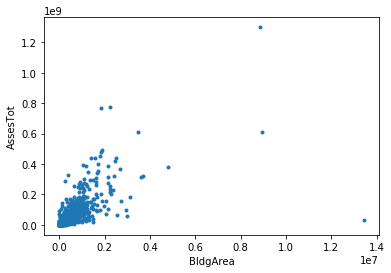

In [31]:
# plotting
plt.plot(data[:,2],data[:,1],'.')
plt.xlabel('BldgArea')
plt.ylabel('AssesTot')
plt.show()

In [32]:
# log scale AssessTot
data[:,1] = np.log(1.0*np.hstack(data[:,1]))
data

array([[0, 18.868636214081434, 2725731, ..., 0, 'L Manhattan', 8],
       [1, 16.316721074458805, 541886, ..., 1, 'L Manhattan', 8],
       [6, 17.04986910452269, 158197, ..., 0, 'L Manhattan', 7],
       ...,
       [42935, 10.268547246009254, 3700, ..., 0, 'WAHI', 1],
       [42936, 11.700798251802508, 2690, ..., 0, 'WAHI', 2],
       [42940, 14.344873302728676, 42933, ..., 0, 'WAHI', 3]],
      dtype=object)

In [33]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 10)
    upper_bound = quartile_3 + (iqr * 10)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [34]:
# remove outliers
index = np.zeros(len(data))
for i in range(1,7):
    index[outliers_iqr(data[:,i])] = 1
data = data[np.where(index==0)]

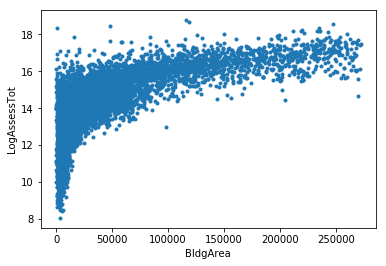

In [35]:
# plotting
plt.plot(data[:,2],data[:,1],'.')
plt.xlabel('BldgArea')
plt.ylabel('LogAssessTot')
plt.show()

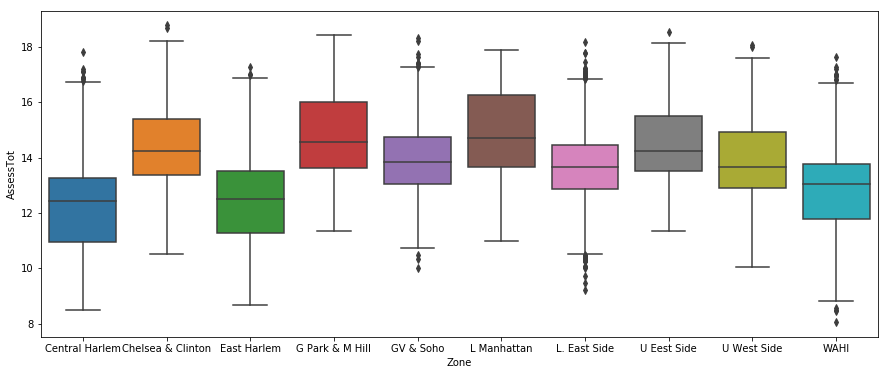

In [36]:
import seaborn as sns
# sns.set(style="ticks")
plt.figure(figsize=(15,6))
plt.xlabel('Zone')
plt.ylabel('AssessTot')
sns.boxplot(y=np.hstack(data[:,1]), x=np.hstack(data[:,33]),width=0.8,order=[u'Central Harlem', u'Chelsea & Clinton', u'East Harlem', u'G Park & M Hill', u'GV & Soho', u'L Manhattan',u'L. East Side', u'U Eest Side', u'U West Side', u'WAHI'])
# sns.boxplot(y=np.hstack(data[:,1]), x=np.hstack(data[:,33]),width=0.8)
plt.show()

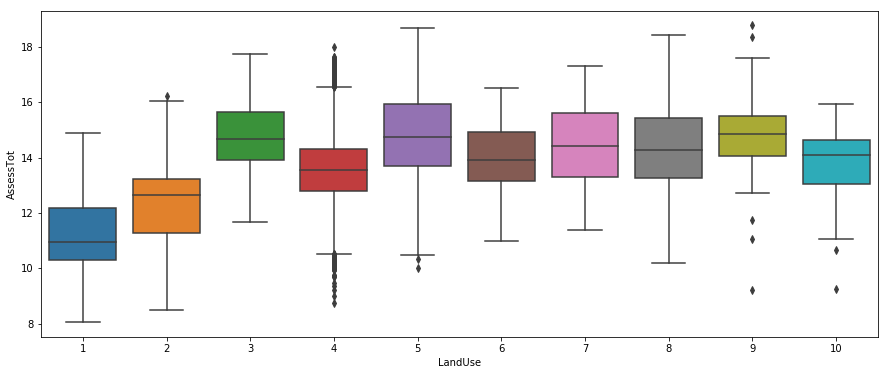

In [37]:
plt.figure(figsize=(15,6))
plt.xlabel('LandUse')
plt.ylabel('AssessTot')
sns.boxplot(y=np.hstack(data[:,1]), x=np.hstack(data[:,34]),width=0.8)
plt.show()

In [38]:
# scaling
data = data[:,1:33].astype(float)
temp = data[:,1:6]
temp = (temp - temp.min(axis = 0))/(temp.max(axis=0)-temp.min(axis = 0))
# scaler = StandardScaler()
# scaler.fit(np.reshape(data[:,0],(len(data[:,0]),1)))
# temp = scaler.transform(temp)
data = np.hstack((np.column_stack((data[:,0],temp)),data[:,6:]))
# adding offset
data = np.hstack((data,np.ones((len(data),1))))

In [39]:
# partitioning, randomly select 80% samples as traininig set, 20% as test set
n = int(len(data)*0.8)
trainset = random.sample(range(len(data)),n)
testset = [i for i in range(len(data)) if i not in trainset]
X = data[trainset,1:]
Y = data[trainset,0]
X_test = data[testset,1:]
Y_test = data[testset,0]

In [43]:
# coefficient plot
def coef_plot(w):
    plt.bar(range(len(w)),w)
    plt.xlabel('predictors')
    plt.ylabel('coefficients')
    plt.title('regression results - coefficients')
    plt.show()

In [44]:
# true value, predicted value
def pred_value_plot(Y,Y_pred):
    plt.figure(figsize=(5,5))
#     plt.plot(np.exp(Y),np.exp(Y_pred),'.')
#     plt.plot(np.exp(Y),np.exp(Y))
    plt.plot(Y,Y_pred,'.')
    plt.plot(Y,Y)
#     plt.xscale('log')
#     plt.yscale('log')
    plt.xlabel('true value')
    plt.ylabel('predicted value')
    plt.title('predicted value vs true value of test set')
    plt.show()

In [56]:
# residual plot
def residual_plot(Y,Y_pred):
    plt.plot(Y_pred,Y-Y_pred,'.')
    plt.plot([0.2,1.2],[0,0])
    plt.xlabel('fitted value')
    plt.ylabel('residual')
    plt.show()

# L2 loss, no reg, package

In [59]:

# l2 loss, no regularizor, python linear regression package
# create linear regression object
regr = linear_model.LinearRegression(fit_intercept=False)
# train the model
regr.fit(X,Y)
# test the model
Y_pred = regr.predict(X)
Y_test_pred = regr.predict(X_test)
# the coefficients
np.set_printoptions(precision=4, suppress=True)
print('coefficients:', regr.coef_)
# mean squared error
print('mean_squared_error train: %.4f' % mean_squared_error(Y,Y_pred))
print('mean_squared_error test: %.4f' % mean_squared_error(Y_test,Y_test_pred))

coefficients: [ 3.3616  4.345   1.2528  0.5898  1.3343  0.2811  0.2578  1.0906  0.2329
  1.1416  0.9447  0.4819  1.0167  1.4286  1.1022  0.4739 -0.6368  0.4417
  1.2627  0.9847  1.3326  0.9933  0.6313  1.1875  0.9824  0.9914  1.8293
  1.1477  1.7575  1.7013  1.735   8.1708]
mean_squared_error train: 0.6921
mean_squared_error test: 0.7211


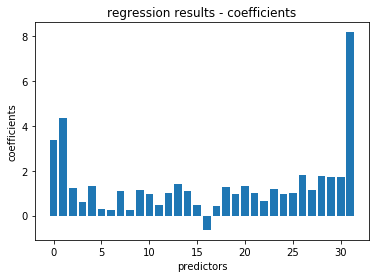

In [60]:
coef_plot(regr.coef_)

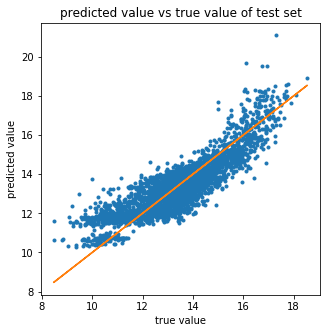

In [61]:
pred_value_plot(Y_test,Y_test_pred)

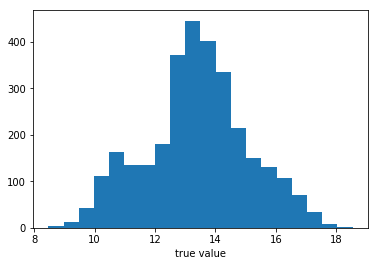

In [62]:
plt.hist(Y_test,bins=20)
plt.xlabel('true value')
plt.show()

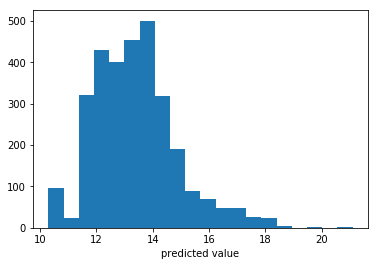

In [63]:

plt.hist(Y_test_pred,bins=20)
plt.xlabel('predicted value')
plt.show()

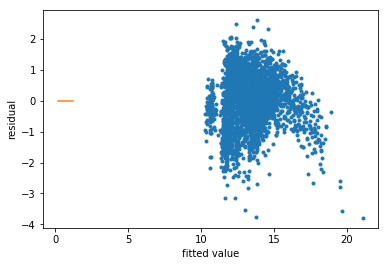

In [64]:
residual_plot(Y_test,Y_test_pred)

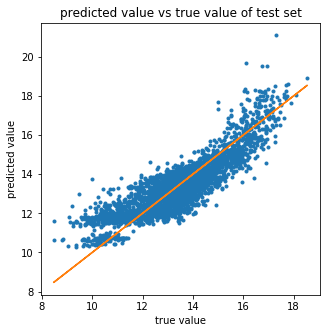

In [65]:
pred_value_plot(Y_test,Y_test_pred)

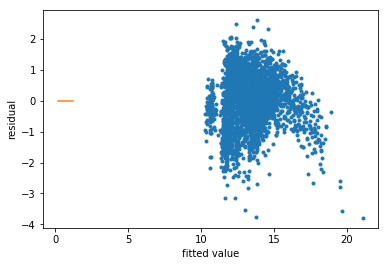

In [66]:
residual_plot(Y_test,Y_test_pred)

In [67]:
# regression with regularization
# objective function of l2 loss smooth regularizor
def l2_smooth(w,X,Y,D):
     return np.square(np.linalg.norm(Y-np.dot(X,w))) + np.square(np.linalg.norm(np.dot(D,w)))
# used to generate the D matrix in smooth regularizor 
def Dmatrix(n):
    r = 0
    t = np.zeros((int(n*(n-1)/2),n))
    for i in range(n-1):
        for j in range(i+1,n):
            t[r,i] = 1
            t[r,j] = -1
            r += 1
    return t

In [68]:
Dmatrix(5)


array([[ 1., -1.,  0.,  0.,  0.],
       [ 1.,  0., -1.,  0.,  0.],
       [ 1.,  0.,  0., -1.,  0.],
       [ 1.,  0.,  0.,  0., -1.],
       [ 0.,  1., -1.,  0.,  0.],
       [ 0.,  1.,  0., -1.,  0.],
       [ 0.,  1.,  0.,  0., -1.],
       [ 0.,  0.,  1., -1.,  0.],
       [ 0.,  0.,  1.,  0., -1.],
       [ 0.,  0.,  0.,  1., -1.]])

In [69]:
# stepsize for proximal gradient
U,s,V = np.linalg.svd(X)
step = 1.0/(2.0*np.square(s[0]))
# initial w
w0 = np.zeros(np.shape(X)[1])
# D matrix for smooth regularizor
D = np.zeros((100,np.shape(X)[1]))
D[0:45,6:16] = Dmatrix(10)
D[45:90,16:26] = Dmatrix(10)
D[90:100,26:31] = Dmatrix(5)


In [70]:
def prox_smooth(stepsize,D,z):
    return np.dot(np.linalg.inv(2.0*stepsize*np.dot(D.T,D) + np.eye(np.shape(D)[1])),z)
def proxi_grad_l2_smooth(X,Y,D,maxiters=50,stepsize=step,w=w0):
    obj = []
    for i in range(maxiters):
        g = 2.0*np.dot(X.T,np.dot(X,w)-Y)
        z = w - stepsize*g
        w = prox_smooth(stepsize,D,z)
        obj.append(l2_smooth(w,X,Y,D))
    return obj,w

In [71]:
obj,w = proxi_grad_l2_smooth(X,Y,D)
Y_test_pred = np.dot(X_test,w)
print('mean_squared_error test: %.4f' % mean_squared_error(Y_test,Y_test_pred))

mean_squared_error test: 1.0067


In [72]:
# Starting here, by Antong
# L2 and no regularizer
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit (X, Y)
w_0 = reg.coef_
pred_w_0 = regr.predict(X_test)
print("Mean squared error: %.4f"
      % mean_squared_error(pred_w_0, Y_test))

Mean squared error: 0.7211


In [73]:
# Get a range of the tuning parameter alpha
alpha_grid = []
for i in range(1000):
    alpha_grid.append(0.01 + (1000 - 0.01) / 1000 * i)

# Use L2 regularizer to generate the model
reg_l2 = linear_model.RidgeCV(alphas=alpha_grid)
reg_l2.fit(X,Y)
w_l2 = reg_l2.coef_
pred_w_l2 = reg_l2.predict(X_test)
print("Mean squared training error: %.4f"
      % mean_squared_error(reg_l2.predict(X), Y))
print("Mean squared error: %.4f"
      % mean_squared_error(pred_w_l2, Y_test))

Mean squared training error: 0.6922
Mean squared error: 0.7208


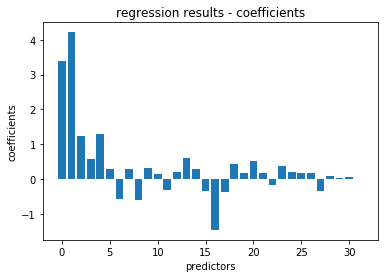

In [74]:
coef_plot(w_l2)

In [75]:
# Use L1 regularizer to generate the model
reg_l1 = linear_model.LassoCV(alphas=alpha_grid)
reg_l1.fit(X,Y)
w_l1 = reg_l1.coef_
pred_w_l1 = reg_l1.predict(X_test)
print("Mean squared training error: %.4f"
      % mean_squared_error(reg_l1.predict(X), Y))
print("Mean squared error: %.4f"
      % mean_squared_error(pred_w_l1, Y_test))

Mean squared training error: 0.7232
Mean squared error: 0.7431


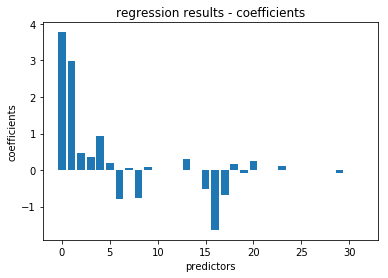

In [76]:
coef_plot(w_l1)

In [77]:
huber = linear_model.HuberRegressor()
huber.fit(X, Y)
w_huber = huber.coef_
pred_w_huber = huber.predict(X_test)
print("Mean squared training error: %.4f"
      % mean_squared_error(huber.predict(X), Y))
print("Mean squared error: %.4f"
      % mean_squared_error(pred_w_huber, Y_test))

Mean squared training error: 0.6981
Mean squared error: 0.7283


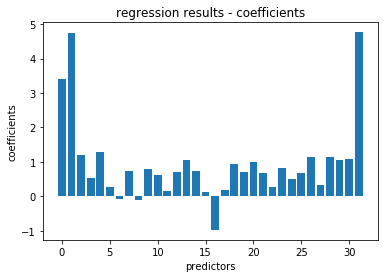

In [78]:
coef_plot(w_huber)